In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd

# Load train and test datasets
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv( '/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Display the first few rows of the train dataframe
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Display the first few rows of the test dataframe
test_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


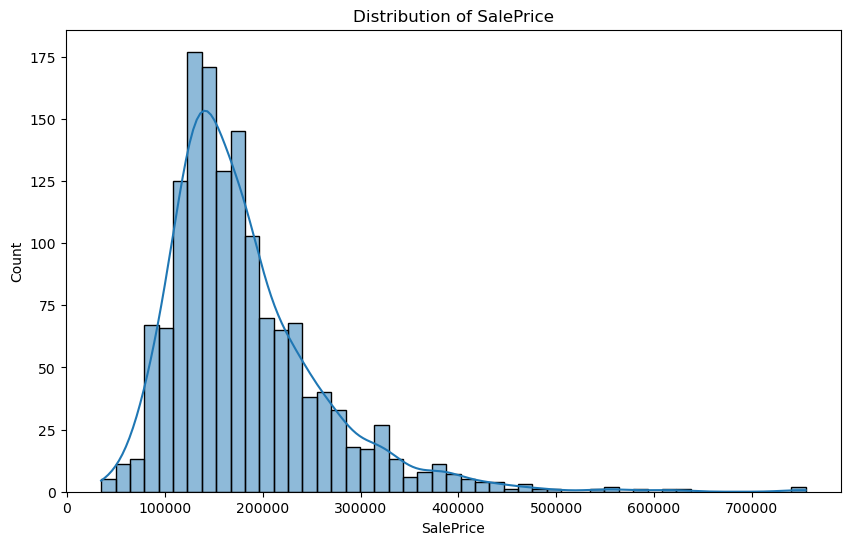

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()


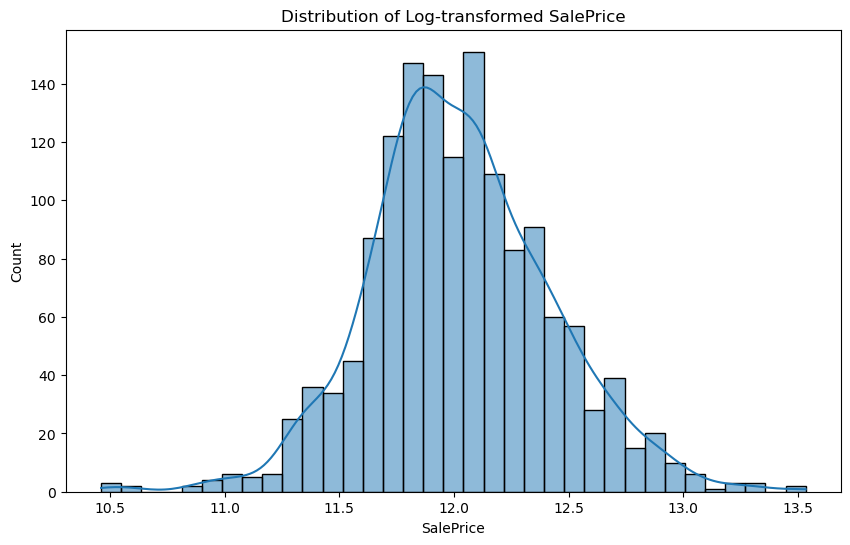

In [5]:
import numpy as np

# Apply log transformation to SalePrice and plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(train_df['SalePrice']), kde=True)
plt.title('Distribution of Log-transformed SalePrice')
plt.show()


In [6]:
# Function to calculate the percentage of missing values in each column
def missing_values(df):
    miss_val = df.isnull().sum()
    miss_val_percent = 100 * df.isnull().sum() / len(df)
    miss_val_table = pd.concat([miss_val, miss_val_percent], axis=1)
    miss_val_table_ren_columns = miss_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    miss_val_table_ren_columns = miss_val_table_ren_columns[miss_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    return miss_val_table_ren_columns

# Display the missing value statistics for train and test datasets
missing_values_train = missing_values(train_df)
missing_values_test = missing_values(test_df)

missing_values_train, missing_values_test


(              Missing Values  % of Total Values
 PoolQC                  1453               99.5
 MiscFeature             1406               96.3
 Alley                   1369               93.8
 Fence                   1179               80.8
 FireplaceQu              690               47.3
 LotFrontage              259               17.7
 GarageType                81                5.5
 GarageYrBlt               81                5.5
 GarageFinish              81                5.5
 GarageQual                81                5.5
 GarageCond                81                5.5
 BsmtExposure              38                2.6
 BsmtFinType2              38                2.6
 BsmtFinType1              37                2.5
 BsmtCond                  37                2.5
 BsmtQual                  37                2.5
 MasVnrArea                 8                0.5
 MasVnrType                 8                0.5
 Electrical                 1                0.1,
               Miss

/tmp/ipykernel_20/3635061258.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_df.corr()


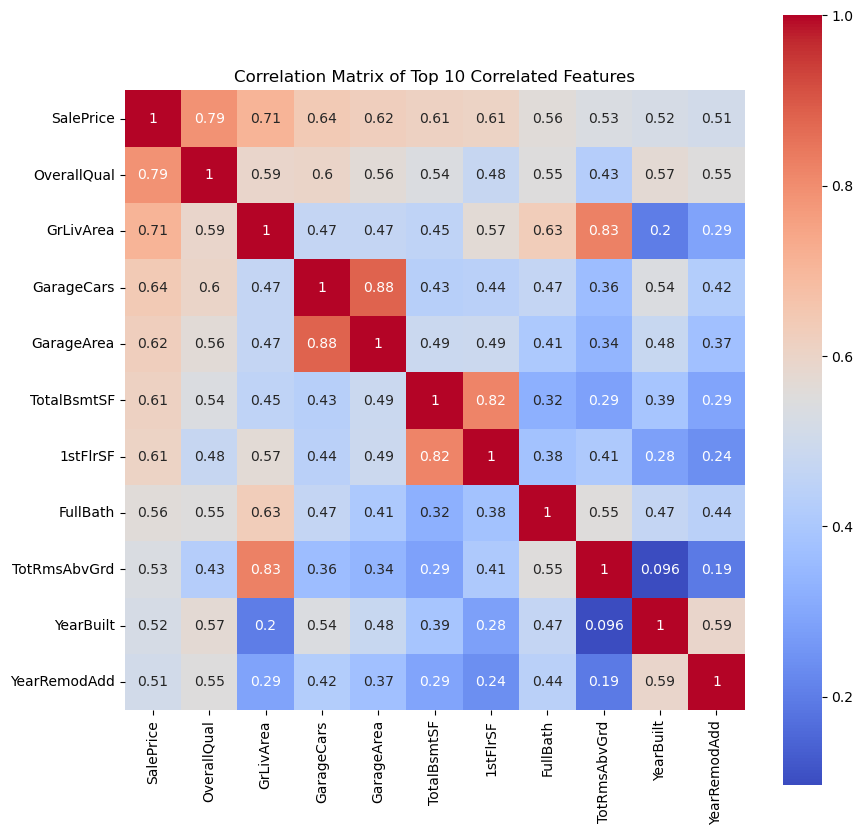

In [7]:
# Calculate correlation matrix
corr_matrix = train_df.corr()

# Get top 10 absolute correlations with SalePrice
top_corr_features = corr_matrix['SalePrice'].apply(np.abs).sort_values(ascending=False).head(11)

# Plot heatmap for top correlated features
plt.figure(figsize=(10, 10))
sns.heatmap(train_df[top_corr_features.index].corr(), annot=True, square=True, cmap='coolwarm')
plt.title('Correlation Matrix of Top 10 Correlated Features')
plt.show()


In [8]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

# Save the target variable and log-transform it
y_train = np.log1p(train_df['SalePrice'])

# Drop the 'Id' and 'SalePrice' columns from the train dataframe
train_df = train_df.drop(['Id', 'SalePrice'], axis=1)

# Drop the 'Id' column from the test dataframe
test_df = test_df.drop(['Id'], axis=1)

# Concatenate the train and test dataframes
all_data = pd.concat([train_df, test_df]).reset_index(drop=True)

all_data.shape


(2919, 79)

In [9]:
# For some categorical features, NaN means that the feature does not exist in the house.
# So we replace NaN with 'None'.
none_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'MasVnrType', 'MSSubClass']
for col in none_cols:
    all_data[col] = all_data[col].fillna('None')

# For some numerical features, NaN means that the feature does not exist in the house.
# So we replace NaN with 0.
zero_cols = ['GarageYrBlt', 'GarageArea', 'GarageCars',
             'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
             'MasVnrArea']
for col in zero_cols:
    all_data[col] = all_data[col].fillna(0)

# For the rest of the categorical features, we replace NaN with the most common value (mode).
mode_cols = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities']
for col in mode_cols:
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

# For 'LotFrontage', we fill in missing values by the median LotFrontage of the neighborhood.
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# Check if there are any remaining missing values
all_data.isnull().sum().sum()


0

In [10]:
# Perform one-hot encoding
all_data = pd.get_dummies(all_data)

all_data.shape


(2919, 302)

In [11]:
# Create new feature TotalSF
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

# Create new feature TotalBath
all_data['TotalBath'] = all_data['FullBath'] + 0.5*all_data['HalfBath'] + all_data['BsmtFullBath'] + 0.5*all_data['BsmtHalfBath']

all_data.shape


(2919, 304)

In [12]:
# Split all_data back into the train and test datasets
train = all_data[:len(y_train)]
test = all_data[len(y_train):]

train.shape, test.shape


((1460, 304), (1459, 304))

In [13]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

# Function to calculate RMSE for cross-validation
def rmse_cv(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse = np.sqrt(-cross_val_score(model, train, y_train, scoring="neg_mean_squared_error", cv=kf))
    return rmse

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(train, y_train)

# Calculate RMSE on training data
rf_train_pred = rf_model.predict(train)
rf_rmse = np.sqrt(mean_squared_error(y_train, rf_train_pred))

rf_rmse


0.05164789479350656

In [14]:
# Calculate RMSE for cross-validation
rf_cv_rmse = rmse_cv(rf_model).mean()

# Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05, max_depth=3, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state=42)
gb_model.fit(train, y_train)

# Calculate RMSE on training data
gb_train_pred = gb_model.predict(train)
gb_rmse = np.sqrt(mean_squared_error(y_train, gb_train_pred))

# Calculate RMSE for cross-validation
gb_cv_rmse = rmse_cv(gb_model).mean()

rf_rmse, rf_cv_rmse, gb_rmse, gb_cv_rmse


(0.05164789479350656,
 0.14294689292263066,
 0.08653779500651078,
 0.12289396513298707)